# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = "/content/train_house.csv"
df = pd.read_csv(house)

In [ ]:
print(df.info())

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


## Missing Value Handling

1. Dari hasil persentase missing value, bisa kita ambil kesimpulan bahwa kolom Alley, MasVnrType, FireplaceQu, Fence, PoolQC, MiscFeature memiliki nilai NaN yang lebih dari 20% yang berarti kita harus menghapus kolom tersebut. Tetapi di kolom tersebut mungkin saja menyimpan pola tersembunyi karena bisa saja ada kondisi bahwa kolom tersebut memiliki nilai NaN karena:  `Tidak ada fitur tersebut di rumah alias nilai None`.



2. Untuk kolom Garage dan Basement yang nilai persentase NaNnya di bawah 20 persen akan kita imputasi None karena bisa saja harga rumah di pengaruhi adanya Basement atau Garage jadi menurut saya akan lebih baik kita isi nilai None agar terdeteksi bahwa rumah tersebut tidak memiliki Garage atau Basement.

3. Untuk kolom sisanya akan kita imputasi antara mode, median, atau mean sesuai dengan tipe data.



In [ ]:
df["Utilities"].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [ ]:
df["GarageArea"][df["GarageArea"].notna()]

,GarageArea
0,548
1,460
2,608
3,642
4,836
...,...
1455,460
1456,500
1457,252
1458,240


In [ ]:
df["GarageArea"][df["GarageArea"].isna()]

,GarageArea


In [ ]:
df["BsmtCond"].head()

In [ ]:
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
none_cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'MasVnrType']

In [ ]:
print(df[garage_cols].info())
print(df[bsmt_cols].info())
print(df[none_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageType    1379 non-null   object
 1   GarageFinish  1379 non-null   object
 2   GarageQual    1379 non-null   object
 3   GarageCond    1379 non-null   object
dtypes: object(4)
memory usage: 45.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1423 non-null   object
 1   BsmtCond      1423 non-null   object
 2   BsmtExposure  1422 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinType2  1422 non-null   object
dtypes: object(5)
memory usage: 57.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---



Untuk kolom kategorikal akan saya isi nilai NaN dengan "None" atas pertimbangan bahwa fitur tersebut penting untuk menentukan harga rumah karena untuk kolom NaN itu bisa berarti bahwa rumah tersebut tidak memiliki fitur tersebut.

In [ ]:
df[none_cols] = df[none_cols].fillna('None')
df[garage_cols] = df[garage_cols].fillna('None')
df[bsmt_cols] = df[bsmt_cols].fillna('None')

Untuk kolom yang NaN tapi numerik akan saya isi nilai 0 yang berarti rumah tersebut tidak memiliki fitur tersebut jika bernilai 0

In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

Untuk Electrical karena missing value sangat kecil maka akan saya isi nilai Modus karena kolom tersebut kategorikal. Sementara LotFrontage akan saya isi nilai median yang tergantung pada Neighborhood, karena panjang jalan rumah akan berpengaruh pada lokasi perumahan tersebut maka imputasinya pakai median per Neighborhood.

In [ ]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
# Memisahkan data menjadi numerikal & kategorikal
# Pisahkan kolom numerik
numerik = df.select_dtypes(include=["int64", "float64"])

# Pisahkan kolom kategorikal (object atau string)
kategorikal = df.select_dtypes(include=["object"])

# 1D Visualization

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual`

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

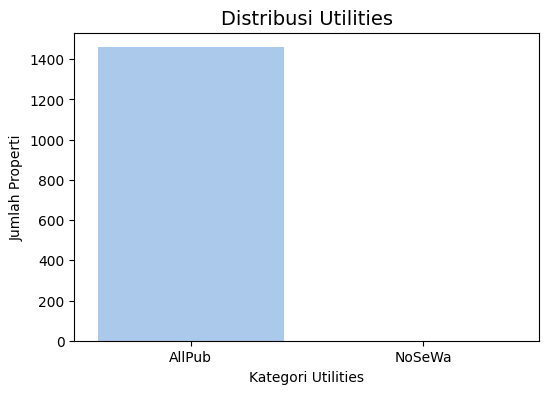

In [ ]:
### Tulis kode Anda di sini
plt.figure(figsize=(6,4))
sns.countplot(x='Utilities', data=df, palette='pastel')

plt.title("Distribusi Utilities", fontsize=14)
plt.xlabel("Kategori Utilities")
plt.ylabel("Jumlah Properti")
plt.show()

### HouseStyle

`HouseStyle`: Style properti (misal: 1 lantai, 2 lantai, dst)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

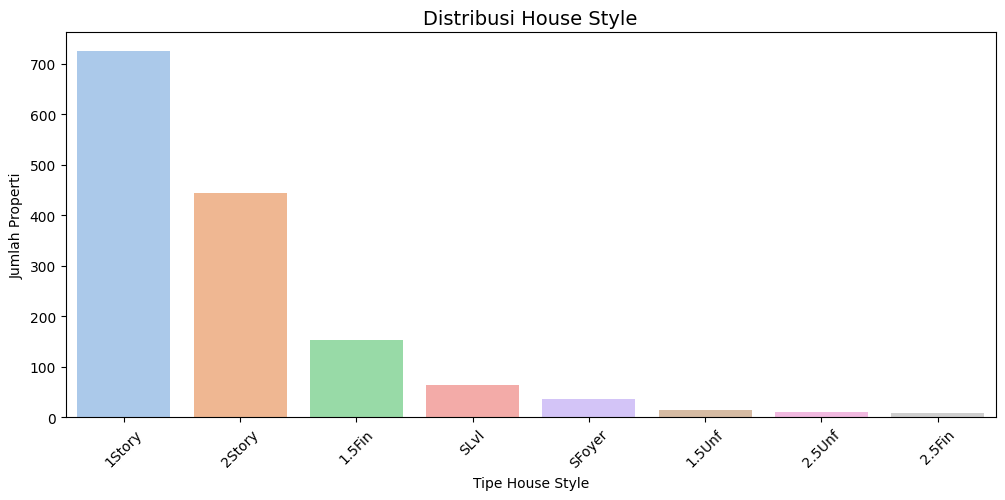

In [ ]:
### Tulis kode Anda di sini
plt.figure(figsize=(12,5))
sns.countplot(x='HouseStyle', data=df, order=df['HouseStyle'].value_counts().index, palette='pastel')

plt.title("Distribusi House Style", fontsize=14)
plt.xlabel("Tipe House Style")
plt.ylabel("Jumlah Properti")
plt.xticks(rotation=45)
plt.show()


### ExterQual

`ExterQual`: Kualitas material eksterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

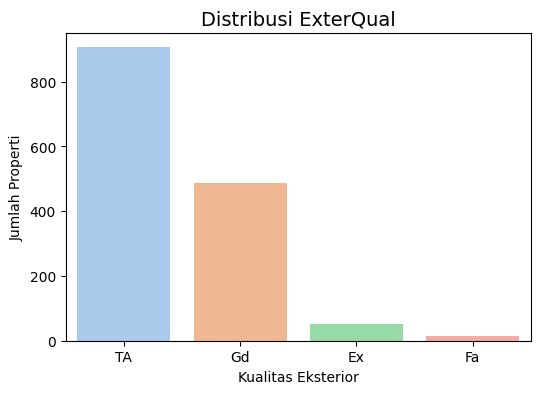

In [ ]:
### Tulis kode Anda di sini
plt.figure(figsize=(6,4))
sns.countplot(x='ExterQual', data=df, order=df['ExterQual'].value_counts().index, palette='pastel')

plt.title("Distribusi ExterQual", fontsize=14)
plt.xlabel("Kualitas Eksterior")
plt.ylabel("Jumlah Properti")
plt.show()


#### **Analisis tentang variabel kategorikal**
1. `Utilities`
* Kondisi dataset: Hampir semua nilai adalah AllPub (artinya tersedia semua utilitas: air, listrik, gas, dan telepon). Nilai lain (seperti NoSewr, NoSeWa) sangat jarang muncul atau bahkan tidak ada.

* Implikasi: Variabel ini tidak memiliki variasi → tidak memberi informasi penting bagi model.

* Dalam machine learning, kolom dengan distribusi seperti ini bisa dianggap tidak berguna (low variance feature).

* Kesimpulan: Variabel ini sebaiknya drop karena hanya menambah kompleksitas tanpa kontribusi informasi.

2. `HouseStyle`

* Kondisi dataset: Mayoritas rumah adalah 1Story, sementara kategori seperti 2.5Fin atau 2.5Unf sangat sedikit.

* Implikasi: Informasi masih relevan karena perbedaan gaya rumah berpotensi memengaruhi harga (misalnya rumah 2 lantai vs 1 lantai).

* Tapi kategori yang sangat sedikit jumlahnya bisa membuat model sulit belajar → risiko rare categories.

* Solusi: Bisa digabungkan kategori yang mirip (misalnya 2.5Fin dan 2.5Unf → kelompok “2.5 Stories”). Atau tetap dipertahankan, tapi perhatikan ketika melakukan encoding (misalnya gunakan target encoding atau frequency encoding).

3. `ExterQual (Exterior Quality)`

* Kondisi dataset: Distribusi condong ke TA (Typical/Average), sementara kategori Fa (Fair) atau Ex (Excellent) sangat jarang.

* Implikasi: Variabel ini sangat penting karena kualitas material eksterior wajar jika memengaruhi harga rumah.

* Ketidakseimbangan masih oke, karena tetap ada variasi yang bisa dipelajari model.

* Solusi: Biarkan apa adanya, tidak perlu drop. Jika nanti pakai model yang sensitif terhadap imbalance (misalnya decission tree masih oke, tapi untuk regresi linear perlu hati-hati), bisa pertimbangkan binning (misalnya TA/Fa = “Standard or below”, Gd/Ex = “Above Average”).

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

mean      180921.195890
median    163000.000000
std        79442.502883
Name: SalePrice, dtype: float64


/tmp/ipython-input-2822837866.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


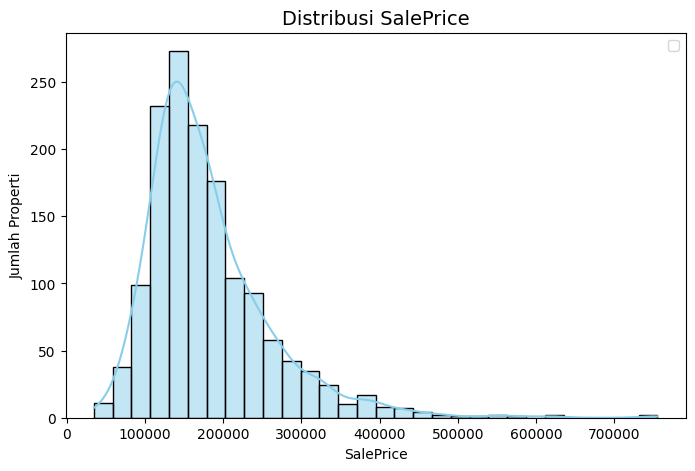

In [ ]:
### Tulis kode Anda di sini
print(df['SalePrice'].agg(['mean', 'median', 'std']))

plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='skyblue')
plt.title("Distribusi SalePrice", fontsize=14)
plt.xlabel("SalePrice")
plt.ylabel("Jumlah Properti")
plt.legend()
plt.show()


#### **Analisis tentang variabel `SalePrice`**

* Mean ≈ 180.921 → rata-rata harga rumah

* Median ≈ 163.000 → nilai tengah harga rumah

* Std Dev ≈ 79.443 → harga rumah bervariasi cukup lebar

**Insight:**

* Mean > Median → menandakan distribusi right-skewed (ada beberapa rumah sangat mahal yang "menarik" rata-rata ke kanan).

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

mean      1515.463699
median    1464.000000
std        525.480383
Name: GrLivArea, dtype: float64


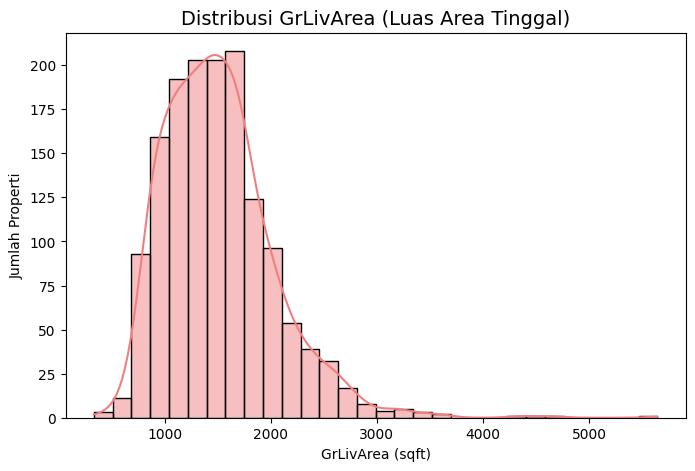

In [ ]:
### Tulis kode Anda di sini
print(df['GrLivArea'].agg(['mean', 'median', 'std']))

plt.figure(figsize=(8,5))
sns.histplot(df['GrLivArea'], kde=True, bins=30, color='lightcoral')
plt.title("Distribusi GrLivArea (Luas Area Tinggal)", fontsize=14)
plt.xlabel("GrLivArea (sqft)")
plt.ylabel("Jumlah Properti")
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* Mean ≈ 1515 sq ft → rata-rata luas area tinggal

* Median ≈ 1464 sq ft → nilai tengah

* Std Dev ≈ 525 sq ft → variasi cukup besar

**Insight:**

* Mean > Median → sedikit right-skewed, ada rumah yang sangat luas → menggeser rata-rata ke kanan.

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

mean      472.980137
median    480.000000
std       213.804841
Name: GarageArea, dtype: float64


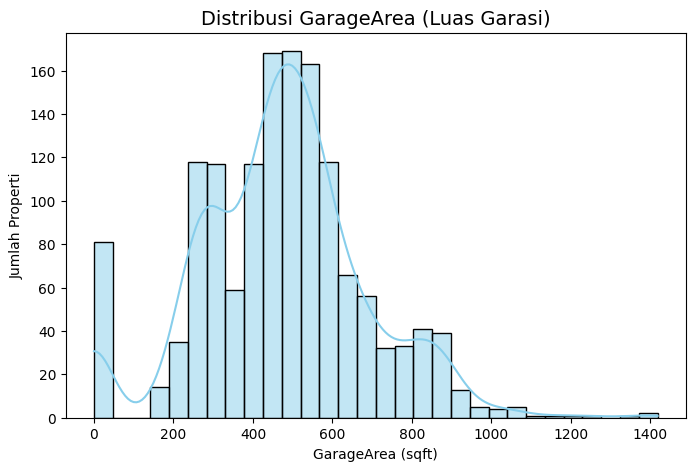

In [ ]:
### Tulis kode Anda di sini
print(df['GarageArea'].agg(['mean', 'median', 'std']))

# Visualisasi distribusi GarageArea
plt.figure(figsize=(8,5))
sns.histplot(df['GarageArea'], kde=True, bins=30, color='skyblue')
plt.title("Distribusi GarageArea (Luas Garasi)", fontsize=14)
plt.xlabel("GarageArea (sqft)")
plt.ylabel("Jumlah Properti")
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* Mean ≈ 473 sq ft → rata-rata luas garasi

* Median ≈ 480 sq ft → nilai tengah, hampir sama dengan mean

* Std Dev ≈ 214 sq ft → variasi cukup besar, beberapa garasi jauh lebih besar atau lebih kecil dari rata-rata

**Insight:**

* Mean ≈ Median → distribusi relatif symmetrical, tidak terlalu skewed.

* Std Dev yang cukup besar menunjukkan ada variasi ukuran garasi (misal beberapa rumah punya 1 mobil, beberapa punya 2–3 mobil, namun ada juga yang tidak ada garasi).

## Pemrosesan Data Variabel Numerikal

SalePrice_log
 median    5.212188
mean      5.221979
std       0.173480
Name: SalePrice_log, dtype: float64


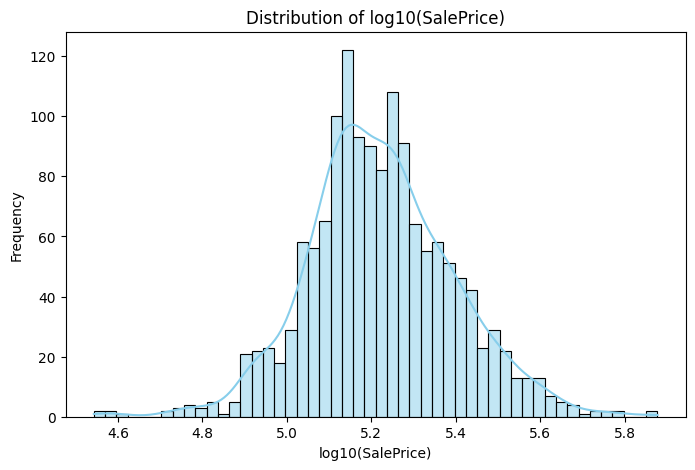

In [ ]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini
df['SalePrice_log'] = np.log10(df['SalePrice'])
print("SalePrice_log\n", df['SalePrice_log'].agg(['median','mean','std']))
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice_log'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of log10(SalePrice)")
plt.xlabel("log10(SalePrice)")
plt.ylabel("Frequency")
plt.show()

GrLivArea_log
 median    3.165541
mean      3.156354
std       0.144859
Name: GrLivArea_log, dtype: float64


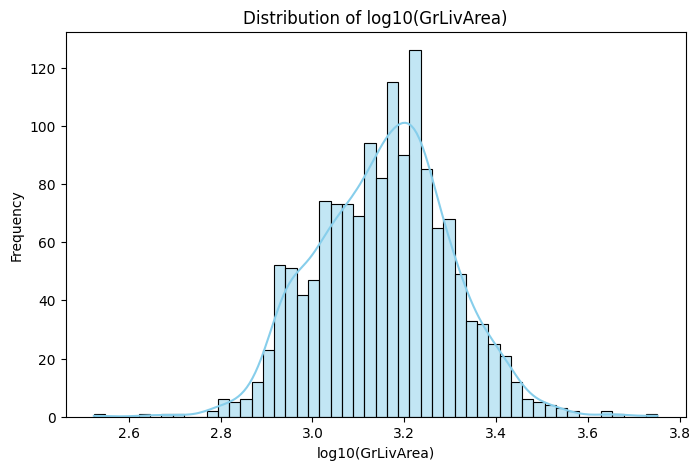

In [ ]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini
# Transformasi log-10 GrLivArea
df['GrLivArea_log'] = np.log10(df['GrLivArea'])
print("GrLivArea_log\n", df['GrLivArea_log'].agg(['median','mean','std']))
plt.figure(figsize=(8,5))
sns.histplot(df['GrLivArea_log'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of log10(GrLivArea)")
plt.xlabel("log10(GrLivArea)")
plt.ylabel("Frequency")
plt.show()


GarageArea_log
 median    2.682145
mean      2.522450
std       0.631950
Name: GarageArea_log, dtype: float64


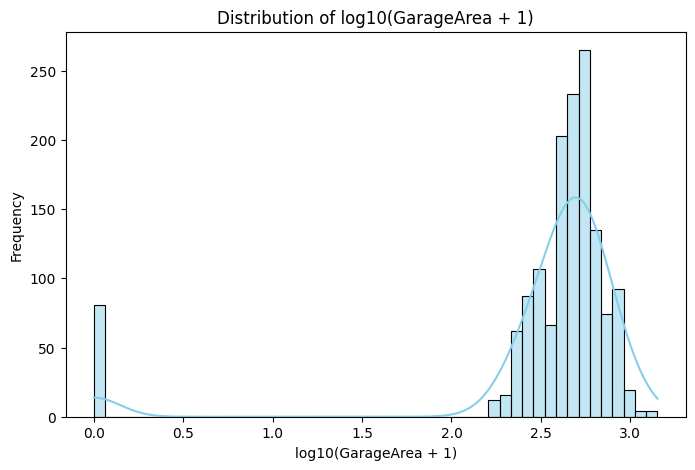

In [ ]:
# Menghilangkan nilai nol pada GarageArea

### Tulis kode Anda di sini
df['GarageArea_log'] = np.log10(df['GarageArea'] + 1)
print("GarageArea_log\n", df['GarageArea_log'].agg(['median','mean','std']))
plt.figure(figsize=(8,5))
sns.histplot(df['GarageArea_log'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of log10(GarageArea + 1)")
plt.xlabel("log10(GarageArea + 1)")
plt.ylabel("Frequency")
plt.show()


#### **Penjelasan dan analisis tentang pemrosesan data**
1. SalePrice_log

* Median ≈ 5.212, Mean ≈ 5.222, Std ≈ 0.173

* Mean dan median hampir sama → distribusi relatif simetris / normal

* Log-transform berhasil mengurangi skewness dari distribusi harga yang sebelumnya right-skewed

2. GrLivArea_log

* Median ≈ 3.166, Mean ≈ 3.156, Std ≈ 0.145

* Mean dan median hampir sama → distribusi cukup simetris / normal

* Log-transform menekan outlier luas area yang sangat besar

3. GarageArea_log

* Median ≈ 2.682, Mean ≈ 2.522, Std ≈ 0.632

* Mean < Median → distribusi masih right-skewed

* nyebab: banyak rumah tidak punya garasi atau garasi kecil (nilai 0 → log(0+1)=0), sedangkan beberapa rumah punya garasi sangat besar → menarik distribusi ke kanan

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

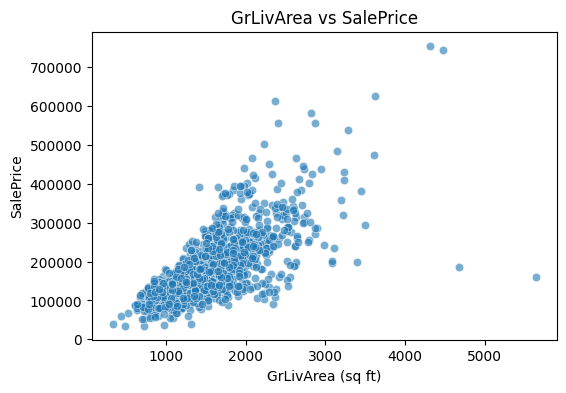

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x="GrLivArea", y="SalePrice", data=df, alpha=0.6)
ax.set_title("GrLivArea vs SalePrice")
ax.set_xlabel("GrLivArea (sq ft)")
ax.set_ylabel("SalePrice")
plt.show()


# `GarageArea` dengan `SalePrice`

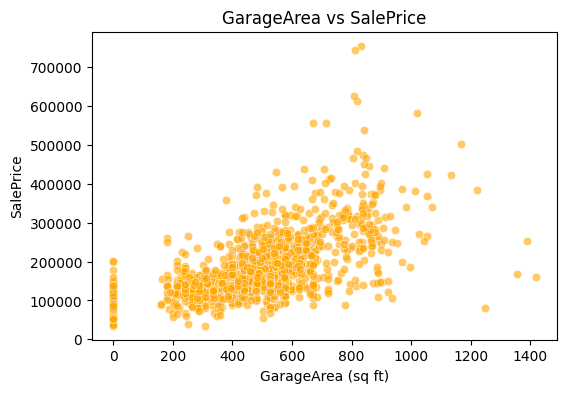

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x="GarageArea", y="SalePrice", data=df, alpha=0.6, color="orange")
ax.set_title("GarageArea vs SalePrice")
ax.set_xlabel("GarageArea (sq ft)")
ax.set_ylabel("SalePrice")
plt.show()


#### **Hipotesis tentang hubungan antar-variabel**
1. **Hubungan GrLivArea (Luas Ruang Tamu di Atas Tanah) dan SalePrice (Harga Jual)**

* Ada korelasi positif dan kuat antara luas ruang tamu di atas tanah (GrLivArea) dan harga jual rumah (SalePrice). Grafik "GrLivArea vs SalePrice" menunjukkan sebaran titik yang cenderung membentuk pola linier ke atas, yang berarti semakin besar luas ruang tamu, semakin tinggi harga jual rumah.     * Hal ini masuk akal karena luas ruang tamu adalah salah satu faktor utama yang menentukan ukuran dan fungsionalitas rumah, sehingga secara langsung mempengaruhi nilai properti.

2. **Hubungan GarageArea (Luas Garasi) dan SalePrice (Harga Jual)**

* Terdapat korelasi positif antara luas garasi (GarageArea) dan harga jual rumah (SalePrice), namun korelasi ini tidak sekuat hubungan antara GrLivArea dan SalePrice. Grafik "GarageArea vs SalePrice" menunjukkan sebaran titik yang lebih menyebar, terutama pada area garasi yang lebih besar.

* Meskipun memiliki garasi yang lebih besar umumnya berkorelasi dengan harga rumah yang lebih tinggi, faktor ini tampaknya tidak menjadi penentu harga yang sekuat luas ruang tamu. Garasi dapat dianggap sebagai fasilitas tambahan, sedangkan luas ruang tamu adalah bagian integral dari properti yang digunakan sehari-hari.

3. **Perbandingan Pengaruh Kedua Variabel**

* GrLivArea memiliki pengaruh yang lebih signifikan terhadap harga jual rumah dibandingkan dengan GarageArea.

* Grafik GrLivArea menunjukkan pola yang lebih terorganisir dan padat, sementara grafik GarageArea memiliki lebih banyak "outliers" dan titik data yang menyebar, menunjukkan bahwa ada faktor lain yang lebih penting yang memengaruhi harga jual, terutama ketika luas garasi sangat besar.

* Bisa jadi, rumah dengan garasi yang sangat besar (lebih dari 1000 sq ft) adalah properti mewah yang juga memiliki luas ruang tamu yang sangat besar, sehingga harga tingginya dipengaruhi oleh kombinasi kedua faktor tersebut, bukan hanya garasi.